# Fisher Linear Discriminant From Scratch

- Linear Classifier.
- Discriminative model.

<font color=blue><b>1- Import Needed Packages</b></font>

In [1]:
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import seaborn as sn
import pandas as pd

### Get the current directory path

In [2]:
home_path = os.getcwd()

<font color=blue><b>2- Load Images </b></font>

In [3]:
path='./Train'
os.chdir(path)

Images=os.listdir()
# print(type(Images)) # How Does it store
# print(Images)
# print(len(Images))# To know number of them

# print(Images)

<font color=blue><b>Load training traget vector</b></font>

In [4]:
# Get target data of training
t = np.genfromtxt('../Training Labels.txt')

<font color=blue><b>3-Sort them and read them </b></font>

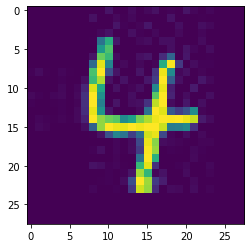

In [5]:
%matplotlib inline
Images1=sorted(Images, key=lambda t: int(os.path.splitext(t)[0])) # sort them ascendingly 
ImagF=np.zeros((2400,784))  # All Images
for i in range(len(Images1)):
    ImagF1=imageio.imread(Images1[i])
    ImagF[i,:]=ImagF1.reshape((1,784))
plt.imshow(ImagF[1000,:].reshape(28,28)) # To Display it

<font color=blue ><b>4-Training Phase (Weights) </b></font> 

In [6]:
def m1(c1):
    #Calculate mean of the intended class 
    #c1 is the first class label that wanted to get its mean, c1 = 0,1,2,... or 9
    Data = ImagF[t == c1]
    m1 = (np.sum(Data, axis=0)/len(Data)).reshape((Data.shape[1], 1))
    return m1

def m2(c2):
    # Calculate mean of the other classes
    # c2 is same as the first class label c1 that wanted to exclude 
    #its data and then get the mean, c2 = 0,1,2,... or 9
    Data = ImagF[t != c2]
    m2 = (np.sum(Data, axis=0)/len(Data)).reshape((Data.shape[1], 1))
    return m2

In [7]:
def S1(c1,m1):
    # Calculate First Term of SW
    # c1 is the first class label that wanted to get its cov, c1 = 0,1,2,... or 9
    n = m1.shape[0]
    S1_t = np.zeros((n, n))
    for i in ImagF[t == c1]:
        i = i.reshape(n,1)
        S1_t += ((i-m1)@((i-m1).T))
    return S1_t

def S2(c2,m2):
    # Calculate Second Term of SW
    # c2 is same as the first class label c1 that wanted to exclude 
    #its data and then get the cov, c2 = 0,1,2,... or 9
    n = m2.shape[0]
    S2_t = np.zeros((n, n))
    for i in ImagF[t != c2]:
        i = i.reshape(n,1)
        S2_t += ((i-m2)@((i-m2).T))
    return S2_t

In [8]:
W=np.zeros((10,784))
W_o=np.zeros((10,1))
counter=0 
for i in range(0,len(Images1),240):
    
    #Get First Class say c1
    #Class label for first class 0,1,2,... or 9
    c1 = counter
    
    #Get Other Classes say c2
    #c2 is the same as Class label of first class c1 in order to exclude this class data from full data
    #c2 = c1 = 0,1,2,... or 9
    c2 = counter
    
    #Get Means
    mean1=m1(c1)
    mean2=m2(c2)
    
    #Calculate SW
    Sw=S1(c1,mean1)+S2(c2,mean2)
    
    #Calculate its invers "Note Use pinv function"
    Sw_inv=np.linalg.pinv(Sw)
    
    #Calculate Weigths of the intended class 
    W[counter] = (Sw_inv @ (mean1 - mean2)).T
    
    #Calculate W_bias of it
    W_o[counter] = -(W[counter].reshape((784, 1))).T @ (mean2 + mean1) / 2
    
    counter+=1


<font color=blue ><b>5-Testing Phase </b></font>

Accuracy:  80.5 %


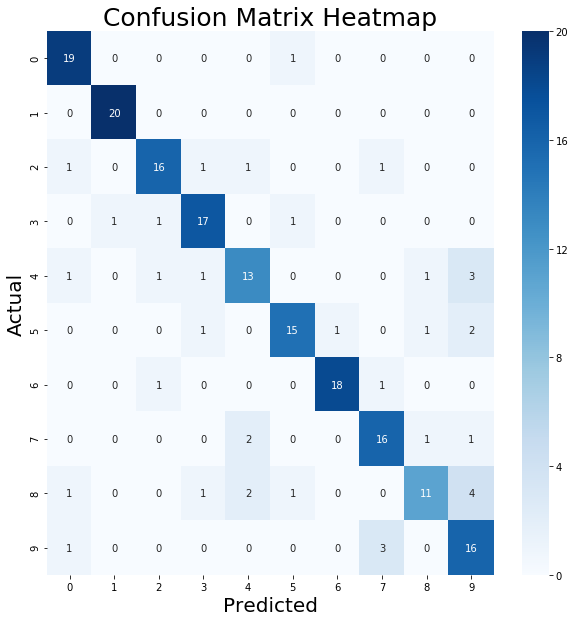

In [9]:
#-----------------Testing---------------
os.chdir(home_path)
Test_Labels=np.loadtxt("Test Labels.txt")
path='./Test'
os.chdir(path)
Test_Image=os.listdir()
Test_Image.pop()
Test_Image1=sorted(Test_Image, key=lambda t: int(os.path.splitext(t)[0]))
Imag_T=np.zeros((200,784))
Predicted_Labels=np.zeros((200))
for i in range(len(Test_Image1)):
    Imag=imageio.imread(Test_Image1[i])
    Imag_T[i,:]=Imag.reshape((1,784)) 
    
    # Calculate Predicted Y 
    Y = (W@Imag_T[i].reshape((784,1))) + W_o
        
    # Calculate Predicted Labels
    Predicted_Labels[i] = np.argmax(Y)

# Calculate Accuracy and Print it
Accuracy = np.sum(Predicted_Labels == Test_Labels) / len(Test_Labels) * 100
print('Accuracy: ', Accuracy, '%')

# Plot Confusion Matrix and save it but take care to save it in another folder NOT TRAIN or TEST
# Get confusion matrix manually
Confusion_Matrix = np.zeros((10,10))
for k in range(10):
    Confusion_Matrix[k, :] = [np.sum((Predicted_Labels == i) & (Test_Labels == k)) for i in range(10)]

# Plot confusion matrix using (pandas, matplotlib and seaborn) packages.
df_cm = pd.DataFrame(Confusion_Matrix, index = range(10), columns = range(10))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, cmap="Blues", vmin=0, vmax=20, annot=True)
plt.title('Confusion Matrix Heatmap', fontsize=25)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

# Then save image to project main folder.
plt.savefig("../Confusion.jpg")